## A Study of PM2.5 Data of Five Chinese Cities
Project follows the CRISP-DM process outlined for questions, by Yu ZHANG

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor

### Business Understanding
PM2.5 readings are often included in air quality reports from environmental authorities and companies. PM2.5 refers to atmospheric particulate matter (PM) that have a diameter less than 2.5 micrometers. In other words, it's used as a measure of pollution.

With air quality data in 5 cities (Shenyang, Chengdu, Beijing, Guangzhou, and Shanghai), we will have a study with main focus on the following questions:

Question 1: During the day, when has worst air quality? And when has best air quality?

Question 2: During the year, when has worst air quality? And when has best air quality?

Question 3: Which city has worst air quality?

Question 4: Does the air quality improve these 6 years?

Question 5: During the day correlation between hour, DEWP, HUMI, PRES, TEMP, Iws, precipitation, Iprec and PM?


Understanding these questions may provide some advice to help people have a better understanding, and living more healthy. And may help the Chinese government to control the pollution more efficiently.

### Data Understanding

In [2]:
#load dataset
beijing_df = pd.read_csv('Data/BeijingPM20100101_20151231.csv')
chengdu_df = pd.read_csv('Data/ChengduPM20100101_20151231.csv')
guangzhou_df = pd.read_csv('Data/GuangzhouPM20100101_20151231.csv')
shanghai_df = pd.read_csv('Data/ShanghaiPM20100101_20151231.csv')
shenyang_df = pd.read_csv('Data/ShenyangPM20100101_20151231.csv')

In [3]:
beijing_df.head()

,No,year,month,day,hour,season,PM_Dongsi,PM_Dongsihuan,PM_Nongzhanguan,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
0,1,2010,1,1,0,4,NaN,NaN,NaN,NaN,-21.0,43.0,1021.0,-11.0,NW,1.79,0.0,0.0
1,2,2010,1,1,1,4,NaN,NaN,NaN,NaN,-21.0,47.0,1020.0,-12.0,NW,4.92,0.0,0.0
2,3,2010,1,1,2,4,NaN,NaN,NaN,NaN,-21.0,43.0,1019.0,-11.0,NW,6.71,0.0,0.0
3,4,2010,1,1,3,4,NaN,NaN,NaN,NaN,-21.0,55.0,1019.0,-14.0,NW,9.84,0.0,0.0
4,5,2010,1,1,4,4,NaN,NaN,NaN,NaN,-20.0,51.0,1018.0,-12.0,NW,12.97,0.0,0.0


In [4]:
chengdu_df.head()

,No,year,month,day,hour,season,PM_Caotangsi,PM_Shahepu,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
0,1,2010,1,1,0,4,NaN,NaN,NaN,4.0,81.20,1022.0,7.0,cv,1.0,0.0,0.0
1,2,2010,1,1,1,4,NaN,NaN,NaN,4.0,86.99,1022.0,6.0,cv,1.0,0.0,0.0
2,3,2010,1,1,2,4,NaN,NaN,NaN,4.0,86.99,1021.0,6.0,cv,1.0,0.0,0.0
3,4,2010,1,1,3,4,NaN,NaN,NaN,3.0,86.89,1021.0,5.0,cv,1.0,0.0,0.0
4,5,2010,1,1,4,4,NaN,NaN,NaN,2.0,86.79,1021.0,4.0,cv,1.0,0.0,0.0


In [5]:
guangzhou_df.head()

,No,year,month,day,hour,season,PM_City Station,PM_5th Middle School,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
0,1,2010,1,1,0,4.0,NaN,NaN,NaN,9.4,76.0,1015.1,13.5,NW,0.8,0.0,0.0
1,2,2010,1,1,1,4.0,NaN,NaN,NaN,10.2,83.0,1015.2,13.0,cv,0.5,0.0,0.0
2,3,2010,1,1,2,4.0,NaN,NaN,NaN,10.4,87.0,1015.0,12.5,NW,0.6,0.3,0.3
3,4,2010,1,1,3,4.0,NaN,NaN,NaN,10.2,89.0,1014.9,12.0,NW,1.4,0.6,0.9
4,5,2010,1,1,4,4.0,NaN,NaN,NaN,10.4,91.0,1014.6,11.8,NE,0.6,0.7,1.6


In [6]:
shanghai_df.head()

,No,year,month,day,hour,season,PM_Jingan,PM_US Post,PM_Xuhui,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
0,1,2010,1,1,0,4,NaN,NaN,NaN,-6.0,59.48,1026.1,1.0,cv,1.0,0.0,0.0
1,2,2010,1,1,1,4,NaN,NaN,NaN,-6.0,59.48,1025.1,1.0,SE,2.0,0.0,0.0
2,3,2010,1,1,2,4,NaN,NaN,NaN,-7.0,59.21,1025.1,0.0,SE,4.0,0.0,0.0
3,4,2010,1,1,3,4,NaN,NaN,NaN,-6.0,63.94,1024.0,0.0,SE,5.0,0.0,0.0
4,5,2010,1,1,4,4,NaN,NaN,NaN,-6.0,63.94,1023.0,0.0,SE,8.0,0.0,0.0


In [7]:
shenyang_df.head()

,No,year,month,day,hour,season,PM_Taiyuanjie,PM_US Post,PM_Xiaoheyan,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
0,1,2010,1,1,0,4,NaN,NaN,NaN,-26.0,69.79,1024.0,-22.0,NE,1.0289,NaN,NaN
1,2,2010,1,1,1,4,NaN,NaN,NaN,-26.0,76.26,1024.0,-23.0,NE,2.5722,NaN,NaN
2,3,2010,1,1,2,4,NaN,NaN,NaN,-27.0,69.56,1023.0,-23.0,NE,5.1444,NaN,NaN
3,4,2010,1,1,3,4,NaN,NaN,NaN,-27.0,69.56,1023.0,-23.0,NE,7.7166,NaN,NaN
4,5,2010,1,1,4,4,NaN,NaN,NaN,-27.0,69.56,1022.0,-23.0,NE,9.7744,NaN,NaN


In [8]:
beijing_df.describe()

,No,year,month,day,hour,season,PM_Dongsi,PM_Dongsihuan,PM_Nongzhanguan,PM_US Post,DEWP,HUMI,PRES,TEMP,Iws,precipitation,Iprec
count,52584.000000,52584.000000,52584.000000,52584.000000,52584.000000,52584.000000,25052.000000,20508.000000,24931.000000,50387.000000,52579.000000,52245.000000,52245.000000,52579.000000,52579.000000,52100.000000,52100.000000
mean,26292.500000,2012.499772,6.523962,15.726609,11.500000,2.491100,89.154439,92.560806,88.643737,95.904241,2.074554,54.602421,1016.465442,12.587040,23.261829,19.258683,19.519008
std,15179.837614,1.707485,3.448452,8.798896,6.922252,1.116988,87.239267,88.027434,88.041166,91.643772,14.222059,25.991338,10.295070,12.098527,49.281706,4381.035532,4381.036040
min,1.000000,2010.000000,1.000000,1.000000,0.000000,1.000000,3.000000,3.000000,3.000000,1.000000,-40.000000,2.000000,991.000000,-19.000000,0.450000,0.000000,0.000000
25%,13146.750000,2011.000000,4.000000,8.000000,5.750000,1.000000,24.000000,28.000000,24.000000,27.000000,-10.000000,31.000000,1008.000000,2.000000,1.790000,0.000000,0.000000
50%,26292.500000,2012.000000,7.000000,16.000000,11.500000,2.000000,64.000000,68.000000,62.000000,69.000000,2.000000,55.000000,1016.000000,14.000000,4.920000,0.000000,0.000000
75%,39438.250000,2014.000000,10.000000,23.000000,17.250000,3.000000,124.000000,127.000000,122.000000,132.000000,15.000000,78.000000,1025.000000,23.000000,21.020000,0.000000,0.000000
max,52584.000000,2015.000000,12.000000,31.000000,23.000000,4.000000,737.000000,672.000000,844.000000,994.000000,28.000000,100.000000,1046.000000,42.000000,585.600000,999990.000000,999990.000000


In [9]:
beijing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52584 entries, 0 to 52583
Data columns (total 18 columns):
No                 52584 non-null int64
year               52584 non-null int64
month              52584 non-null int64
day                52584 non-null int64
hour               52584 non-null int64
season             52584 non-null int64
PM_Dongsi          25052 non-null float64
PM_Dongsihuan      20508 non-null float64
PM_Nongzhanguan    24931 non-null float64
PM_US Post         50387 non-null float64
DEWP               52579 non-null float64
HUMI               52245 non-null float64
PRES               52245 non-null float64
TEMP               52579 non-null float64
cbwd               52579 non-null object
Iws                52579 non-null float64
precipitation      52100 non-null float64
Iprec              52100 non-null float64
dtypes: float64(11), int64(6), object(1)
memory usage: 7.2+ MB


Here, according to the Kaggle data context:
The time period for this data is between Jan 1st, 2010 to Dec 31st, 2015. Missing data are denoted as NA.

1. No: row number
2. year: year of data in this row
3. month: month of data in this row
4. day: day of data in this row
5. hour: hour of data in this row
6. season: season of data in this row
7. PM: PM2.5 concentration (ug/m^3)
8. DEWP: Dew Point (Celsius Degree)
9. TEMP: Temperature (Celsius Degree)
10. HUMI: Humidity (%)
11. PRES: Pressure (hPa)
12. cbwd: Combined wind direction
13. Iws: Cumulated wind speed (m/s)
14. precipitation: hourly precipitation (mm)
15. Iprec: Cumulated precipitation (mm)

### Prepare Data
Some data preparation steps need to be done before using the dataset for exploration, including：
1. Create a PM column, based on other PM_* columns, here we will use its mean value. Then we drop the PM_* columns
2. Merge all these 5 tables
3. Drop rows with NaN PM  
4. Drop unused columns
5. One-Hot Encoding for Categorical variable cbwd and City
6. Imputing values

In [10]:
# Data Preparation Step 1: We will create a column PM for each table
beijing_df['PM'] = beijing_df[['PM_Dongsi','PM_Dongsihuan','PM_Nongzhanguan','PM_US Post']].mean(numeric_only=True, axis=1)
chengdu_df['PM'] = chengdu_df[['PM_Caotangsi','PM_Shahepu', 'PM_US Post']].mean(numeric_only=True, axis=1)
guangzhou_df['PM'] = guangzhou_df[['PM_City Station','PM_5th Middle School', 'PM_US Post']].mean(numeric_only=True, axis=1)
shanghai_df['PM'] = shanghai_df[['PM_Jingan','PM_US Post', 'PM_Xuhui']].mean(numeric_only=True, axis=1)
shenyang_df['PM'] = shenyang_df[['PM_Taiyuanjie','PM_US Post', 'PM_Xiaoheyan']].mean(numeric_only=True, axis=1)

In [11]:
beijing_df = beijing_df.drop(['PM_Dongsi','PM_Dongsihuan','PM_Nongzhanguan','PM_US Post'], axis = 1)
chengdu_df = chengdu_df.drop(['PM_Caotangsi','PM_Shahepu', 'PM_US Post'], axis = 1)
guangzhou_df = guangzhou_df.drop(['PM_City Station','PM_5th Middle School', 'PM_US Post'], axis = 1)
shanghai_df = shanghai_df.drop(['PM_Jingan','PM_US Post', 'PM_Xuhui'], axis = 1)
shenyang_df = shenyang_df.drop(['PM_Taiyuanjie','PM_US Post', 'PM_Xiaoheyan'], axis = 1)

In [12]:
# Data Preparation Step 2: Merge all these 5 tables
# First wee add a colomn city:
beijing_df['City'] = 'beijing'
chengdu_df['City'] = 'chengdu'
guangzhou_df['City'] = 'guangzhou'
shanghai_df['City'] = 'shanghai'
shenyang_df['City'] = 'shenyang'

In [13]:
# We merge all of them:
data = beijing_df.append(chengdu_df, ignore_index=True).append(guangzhou_df, ignore_index=True).append(shanghai_df, ignore_index=True).append(shenyang_df, ignore_index=True)

In [14]:
data.shape

(262920, 16)

Here, we can see that we have 262920 rows, 262920 = 5 * 52584, so the merge is correct.

In [15]:
# Data Preparation Step 3: Drop rows with NaN PM
data = data.dropna(subset=['PM'], axis=0)

In [16]:
data.shape

(175245, 16)

(262920 - 175245)/262920 = 33.3% data has been dropen.

In [17]:
# Data Preparation Step 4: Drop unused columns: we don't need the 'No' colomn and for 'season', we can infer this information from month, day
data = data.drop(['No','season'], axis = 1)

In [18]:
data.shape

(175245, 14)

In [19]:
# Data Preparation Step 5: One-Hot Encoding for Categorical variable cbwd and City
cat_cols = ['cbwd','City']
for col in  cat_cols:
    # for each cat add dummy var, drop original column except City which we will use this column directly
    data = pd.concat([data.drop(col, axis=1), pd.get_dummies(data[col], prefix=col, prefix_sep='_')], axis=1)

In [20]:
data.head()

,year,month,day,hour,DEWP,HUMI,PRES,TEMP,Iws,precipitation,...,cbwd_NE,cbwd_NW,cbwd_SE,cbwd_SW,cbwd_cv,City_beijing,City_chengdu,City_guangzhou,City_shanghai,City_shenyang
23,2010,1,1,23,-17.0,41.0,1020.0,-5.0,0.89,0.0,...,0,0,0,0,1,1,0,0,0,0
24,2010,1,2,0,-16.0,38.0,1020.0,-4.0,1.79,0.0,...,0,0,1,0,0,1,0,0,0,0
25,2010,1,2,1,-15.0,42.0,1020.0,-4.0,2.68,0.0,...,0,0,1,0,0,1,0,0,0,0
26,2010,1,2,2,-11.0,63.5,1021.0,-5.0,3.57,0.0,...,0,0,1,0,0,1,0,0,0,0
27,2010,1,2,3,-7.0,85.0,1022.0,-5.0,5.36,0.0,...,0,0,1,0,0,1,0,0,0,0


In [21]:
# Data Preparation Step 6: Imputing values
# First, we check the NA values:
data.isnull().sum()

year                 0
month                0
day                  0
hour                 0
DEWP               505
HUMI               842
PRES               850
TEMP               504
Iws                512
precipitation     5446
Iprec             5446
PM                   0
cbwd_NE              0
cbwd_NW              0
cbwd_SE              0
cbwd_SW              0
cbwd_cv              0
City_beijing         0
City_chengdu         0
City_guangzhou       0
City_shanghai        0
City_shenyang        0
dtype: int64

In [22]:
# We will fill the NA with mean values:
fill_mean = lambda col: col.fillna(col.mean()) # Mean function

data = data.apply(fill_mean, axis=0) #Fill all missing values with the mean of the column.

# test look
data.head()

,year,month,day,hour,DEWP,HUMI,PRES,TEMP,Iws,precipitation,...,cbwd_NE,cbwd_NW,cbwd_SE,cbwd_SW,cbwd_cv,City_beijing,City_chengdu,City_guangzhou,City_shanghai,City_shenyang
23,2010,1,1,23,-17.0,41.0,1020.0,-5.0,0.89,0.0,...,0,0,0,0,1,1,0,0,0,0
24,2010,1,2,0,-16.0,38.0,1020.0,-4.0,1.79,0.0,...,0,0,1,0,0,1,0,0,0,0
25,2010,1,2,1,-15.0,42.0,1020.0,-4.0,2.68,0.0,...,0,0,1,0,0,1,0,0,0,0
26,2010,1,2,2,-11.0,63.5,1021.0,-5.0,3.57,0.0,...,0,0,1,0,0,1,0,0,0,0
27,2010,1,2,3,-7.0,85.0,1022.0,-5.0,5.36,0.0,...,0,0,1,0,0,1,0,0,0,0


In [23]:
#Recheck
data.isnull().sum()

year              0
month             0
day               0
hour              0
DEWP              0
HUMI              0
PRES              0
TEMP              0
Iws               0
precipitation     0
Iprec             0
PM                0
cbwd_NE           0
cbwd_NW           0
cbwd_SE           0
cbwd_SW           0
cbwd_cv           0
City_beijing      0
City_chengdu      0
City_guangzhou    0
City_shanghai     0
City_shenyang     0
dtype: int64

### Answer Questions base on dataset
Now our data is ready! We can use this dataset to study our questions:

Text(0, 0.5, 'PM2.5')

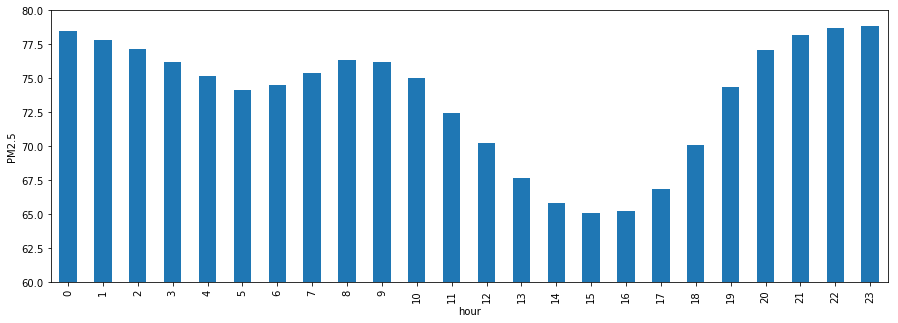

In [24]:
# Question 1: During the day, when has worst air quality? And when has best air quality?
plt.figure(figsize = (15,5))
data.groupby('hour')['PM'].mean().plot('bar')
plt.ylim([60,80])
plt.ylabel('PM2.5')

We can see clearly from the graph that during the day, the midnight has worst air quality. And in the afternoon between 15-16 o'clock, the air quality is the best.

But please pay attentation, the best air quality with PM2.5 around 66 ug/m^3, is still not a very good value.

Here is a standard from https://aqicn.org/faq/2013-09-09/revised-pm25-aqi-breakpoints/

| AQI Category        | Index Values           | Breakpoints (µg/m3, 24-hour average)  |
| ------------- |:-------------:| -----:|
| Good        | 0 - 50           | 0.0 - 15.0  |
| Moderate        | 51 - 100           | >15.0 - 40  |
| Unhealthy for Sensitive Groups        | 101 – 150           | >40 – 65  |

Text(0, 0.5, 'PM2.5')

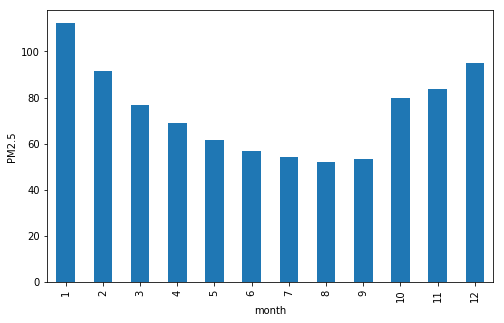

In [25]:
# Question 2: During the year, when has worst air quality? And when has best air quality?
plt.figure(figsize = (8,5))
data.groupby('month')['PM'].mean().plot('bar')
plt.ylabel('PM2.5')

During the winter, we can clearly see that the air quality is the worst, and in summer, it's much better. 

I think that in winter, people use heating devise and more electricity is produced and consumed. And we know that in China, more than a half of the electricity is produced by thermal power plant which produces much cinder and CO2. That's should be the main cause.

In [26]:
# Question 3: Which city has worst air quality?
data_beijing = data[data['City_beijing'] == 1]
data_chengdu = data[data['City_chengdu'] == 1]
data_guangzhou = data[data['City_guangzhou'] == 1]
data_shanghai = data[data['City_shanghai'] == 1]
data_shenyang = data[data['City_shenyang'] == 1]

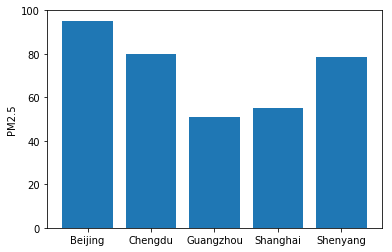

In [27]:
PMByCity = {'Beijing': data_beijing.PM.mean(), 'Chengdu': data_chengdu.PM.mean(), 'Guangzhou': data_guangzhou.PM.mean(), 'Shanghai': data_shanghai.PM.mean(), 'Shenyang':data_shenyang.PM.mean()}
plt.bar(range(len(PMByCity)), list(PMByCity.values()), align='center')
plt.xticks(range(len(PMByCity)), list(PMByCity.keys()))
plt.ylabel('PM2.5')
plt.show()

The capital has worst air quality! And the average value is very close to 100! According to AQI Category, it's very unhealthy!

Shanghai and Guangzhou have better air quality.  That's because to their geographic location. As Guangzhou is a south city, it doesn't need to use heating devise in the winter. And Shanghai is a seaside city. What's why they have better air quality.

Text(0, 0.5, 'PM2.5')

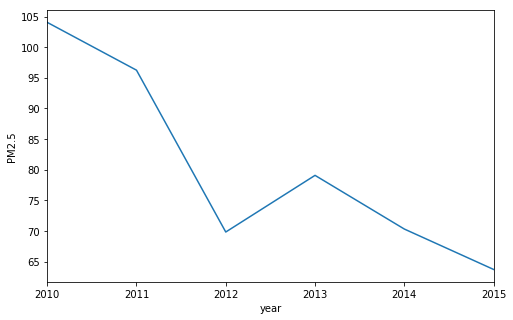

In [28]:
# Question 4: Does the air quality improve these 6 years?
plt.figure(figsize = (8,5))
data.groupby('year')['PM'].mean().plot()
plt.ylabel('PM2.5')

That's a quite good news! I believe that Chinese government has taken measures to reduce the air pollution! We can see that from 2010 to 2015, the average PM2.5 is reduced by almost 39%! Awesome!

In [29]:
# Question 5: During the day correlation between hour, DEWP, HUMI, PRES, TEMP, Iws, precipitation, Iprec and PM?
Correlation_DF = data[['hour', 'DEWP', 'HUMI', 'PRES', 'TEMP', 'Iws', 'precipitation', 'Iprec', 'PM']]
Correlation_DF.corr()

,hour,DEWP,HUMI,PRES,TEMP,Iws,precipitation,Iprec,PM
hour,1.000000,0.000517,-0.100279,-0.029302,0.120509,0.038960,0.000515,0.000521,-0.014624
DEWP,0.000517,1.000000,0.937066,-0.201530,0.226479,-0.035853,-0.000434,-0.000399,-0.039046
HUMI,-0.100279,0.937066,1.000000,-0.116578,0.049587,-0.066285,0.000031,0.000133,0.056408
PRES,-0.029302,-0.201530,-0.116578,1.000000,-0.798199,0.118080,-0.000052,-0.000205,0.185828
TEMP,0.120509,0.226479,0.049587,-0.798199,1.000000,-0.074970,-0.002504,-0.002435,-0.273374
Iws,0.038960,-0.035853,-0.066285,0.118080,-0.074970,1.000000,-0.000876,-0.000804,-0.169516
precipitation,0.000515,-0.000434,0.000031,-0.000052,-0.002504,-0.000876,1.000000,0.999998,-0.002052
Iprec,0.000521,-0.000399,0.000133,-0.000205,-0.002435,-0.000804,0.999998,1.000000,-0.002194
PM,-0.014624,-0.039046,0.056408,0.185828,-0.273374,-0.169516,-0.002052,-0.002194,1.000000


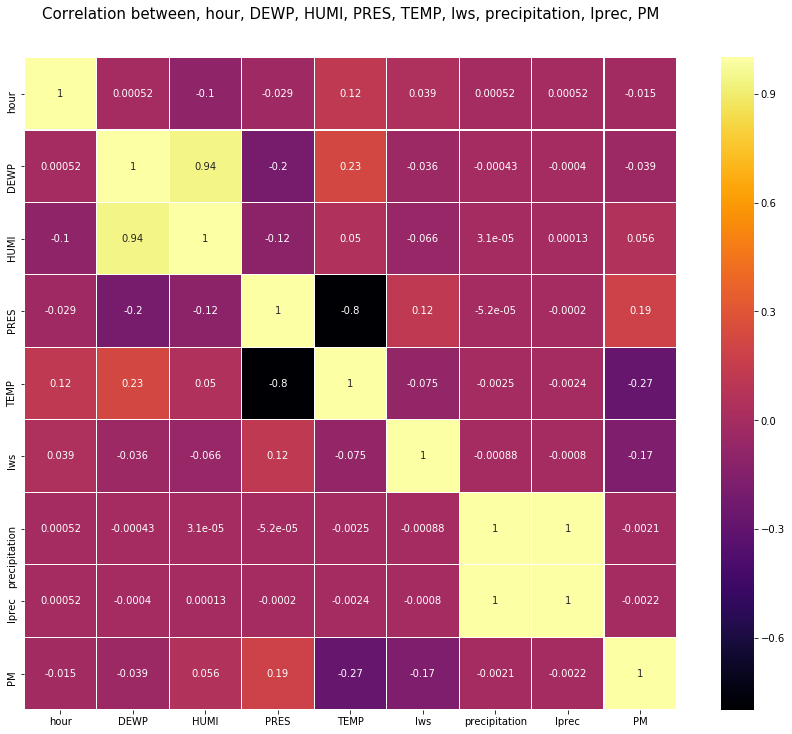

In [30]:
colormap = plt.cm.inferno
plt.figure(figsize=(16,12))
plt.title('Correlation between, hour, DEWP, HUMI, PRES, TEMP, Iws, precipitation, Iprec, PM', y=1.05, size=15)
sns.heatmap(Correlation_DF.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

From the grape above, we can see that temperature(TEMP) has the most influence on PM during the day, as we can see the negatif correlation between TEMP and PM. So it's due to the heating system in China, when it's cold, people will use heating devise and more electricity is produced and consumed. So more cinder is produced which results the low air quality.

###  Train model and Measure Performance

Can we use this data to predict the future? That's a quite important question.

Here we will try to use the data from the year 2010 to 2014, to predict the air quality in 2015. For prediction, data always comes after, so here we can't use the classic train_test_split method.

In [31]:
train_data = data[data['year']!=2015]
test_data = data[data['year']==2015]

In [32]:
y_train = train_data['PM']
x_train = train_data.drop(['PM'],axis=1)
y_test = test_data['PM']
x_test = test_data.drop(['PM'],axis=1)

In [33]:
ForestRegressor = RandomForestRegressor(n_estimators=100)
ForestRegressor.fit(x_train, y_train)
y_test_preds = ForestRegressor.predict(x_test)
print(r2_score(y_test, y_test_preds))
print(mean_squared_error(y_test, y_test_preds))

0.31053720745803737
2763.903561206568


In [34]:
coefs_df = pd.DataFrame()

coefs_df['Features'] = x_train.columns
coefs_df['Coefs'] = ForestRegressor.feature_importances_
coefs_df.sort_values('Coefs', ascending=False)

,Features,Coefs
2,day,0.137781
5,HUMI,0.128541
1,month,0.108745
7,TEMP,0.097383
8,Iws,0.094645
6,PRES,0.088513
4,DEWP,0.081385
16,City_beijing,0.059825
3,hour,0.056527
0,year,0.051100


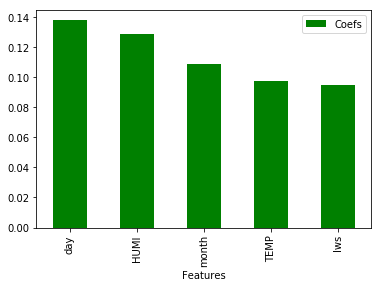

In [35]:
coefs_df.set_index('Features', inplace=True)
coefs_df.sort_values('Coefs', ascending=False).head(5).plot(kind='bar', color='green')

We don't have a very high score, this model may not be very accurate. 

And from this model, day, HUMI, month, TEMP, lws are the 5 features that influence the air quality the most. Which is also coherent with the conclusion we draw from previous section.